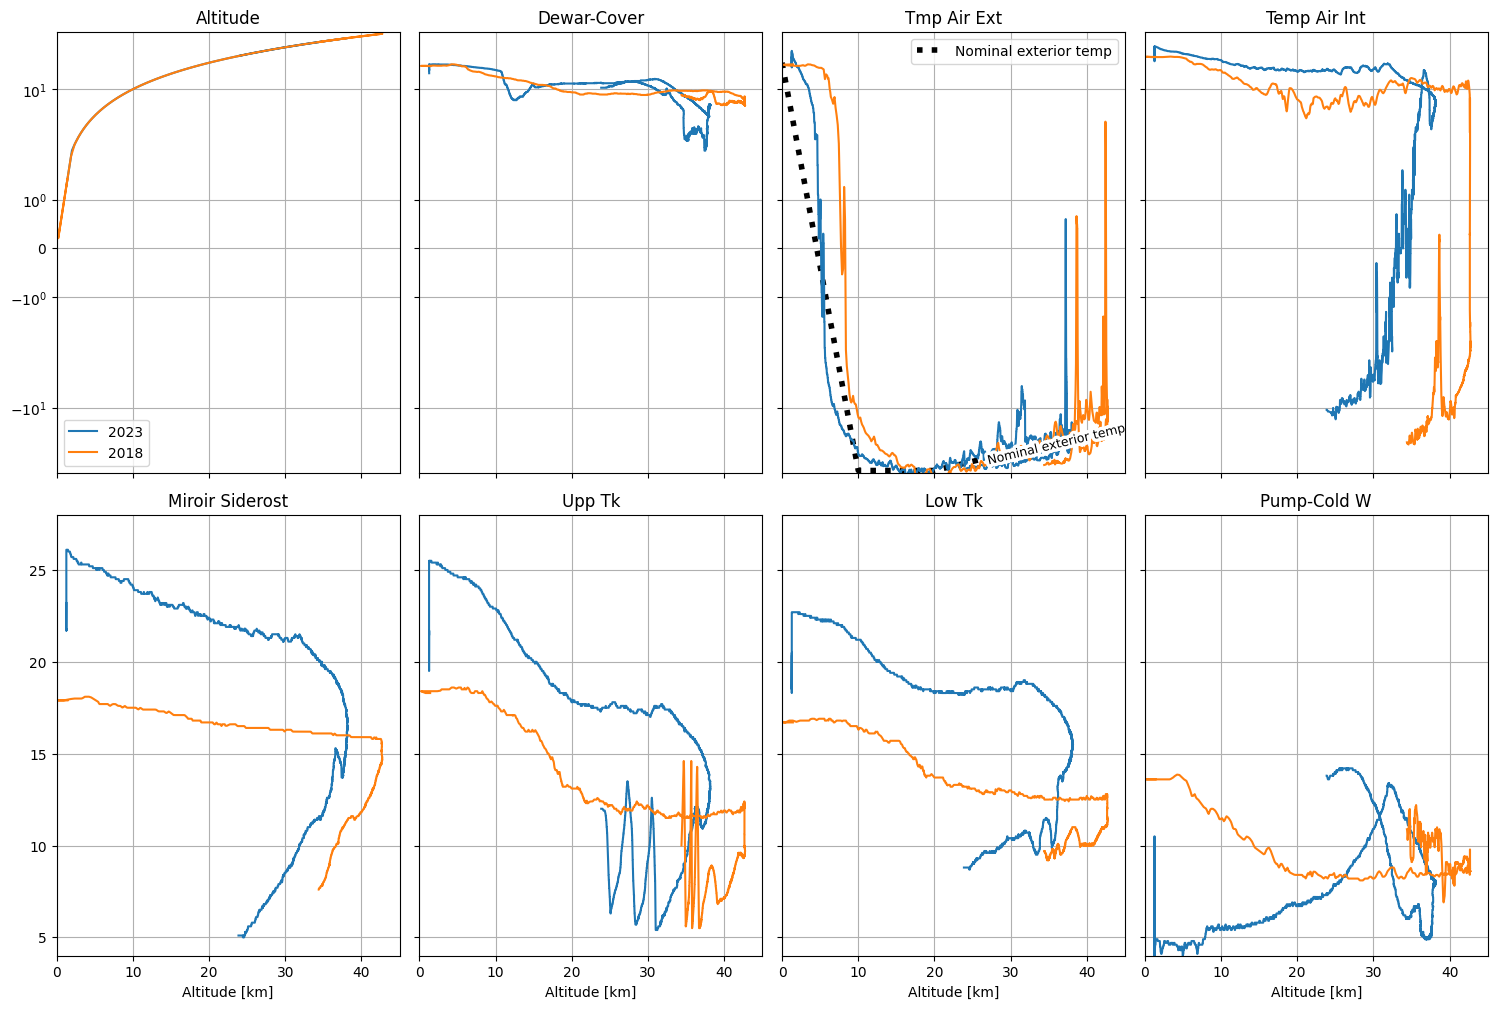

In [3]:
import matplotlib.pyplot as plt
from astropy.table import Table
import numpy as np
from labellines import labelLines
import warnings
warnings.filterwarnings("ignore")


c18 = Table.read("/Users/Vincent/Downloads/Safari/FlightPrincipalCatalog_Final_V3_11122018.csv")
c23 = Table.read("/Users/Vincent/Library/CloudStorage/GoogleDrive-vp2376@columbia.edu/.shortcut-targets-by-id/1ZgB7kY-wf7meXrq8v-1vIzor75aRdLDn/FIREBall-2/FB2_2023/Flight/Fichiers_Pour_La_Science_FLIGHT_2023.csv")
# plot with time 
# plot with altitude
c18["altitudes"] = c18["altitudes[Feets]"]/3/1000
c23["Altitude"] = c23["Altitude"]/1000
fig, axes = plt.subplots(2,4,figsize=(15,10),sharex=True,sharey="row")
axs = axes.flatten()
alpha=1
a=0
if a==0:
    axs[2].plot([0,10,20,40],[20,-52,-52,-20],"k:",lw=4,label="Nominal exterior temp")
    axs[2].legend()    
vals = {"Open        doors":399,
        "Solaris to sun":431,
        "Float & solaris to sun":158,
        "TBS":410,
        "GPeltier OFF":468,
        "GPeltier ON":492,
        # "GPeltier OFF ":501,
        "2xON/OFF DOBC":350,
        # "DOBC powered":519,
        }

DOBC = {
        
        "DOBC ON ":284,
        "DOBC ON":488,
        "DOBC turn OFF":357,
        " DOBC ON ":519,
        "Open doors":399,
        # " DOBC OFF ":525,
        }


Vals_2018 = {
        
        "Azimuth calib & at float":178,
        "Doors open":461,
        "GO to TBS 2.2":518,
        # " DOBC ON ":519,
        # "Open doors":399,
        # " DOBC OFF ":525,
        }



for ax in [axs[0],axs[3]]:
    ax.fill_between(x=[480,630],y1=50,y2=0,alpha=0.2,color="b")
    ax.fill_between(x=[480+30,630],y1=50,y2=0,alpha=0.2,color="b")
    ax.fill_between(x=[480+60,630],y1=50,y2=0,alpha=0.2,color="b")
    ax.fill_between(x=[480+90,630],y1=50,y2=0,alpha=0.2,color="b")

    ax.fill_between(x=[480+40,630],y1=0,y2=-60,alpha=0.3,color="orange")
    ax.fill_between(x=[480+30+40,630],y1=0,y2=-60,alpha=0.3,color="orange")
    ax.fill_between(x=[480+60+40,630],y1=0,y2=-60,alpha=0.3,color="orange")
    ax.fill_between(x=[480+90+40,630],y1=0,y2=-60,alpha=0.3,color="orange")

for f1,f2,ax in zip(["altitudes","Dewar-Cover","Temp Air Ext","Temp Air Int","Siderostat Mirror Verif","CNES Upper Tank Verif","CNES Lower Tank Verif","CNES Pump - Cold Water"],["Altitude","Dewar-Cover","Tmp Air Ext","Temp Air Int","Miroir Siderost","Upp Tk","Low Tk","Pump-Cold W"],axs):
    if a==1:
    
        ax.plot(c23["CompteurSec"]/60-505,c23[f2],label=("2023" if f1=="altitudes" else None))
        ax.plot(c18["Mins after launch"],c18[f1],label=("2018" if f1=="altitudes" else None))
    else:
        ax.plot(c23["Altitude"],c23[f2],label=("2023" if f1=="altitudes" else None))
        ax.plot(c18["altitudes"][c18["Mins after launch"]<680],c18[f1][c18["Mins after launch"]<680],label=("2018" if f1=="altitudes" else None))
    
    ax.set_title(f2)
    # axs[1].axvline(280,ls=":",c="orange",alpha=0.5)
    if f1=="altitudes":
        ax.legend()
    ax.grid()

for key in DOBC.keys():
    axs[1].axvline(DOBC[key],ls=":",alpha=alpha,label=key)


for ax in axs[2:]:
    for key in vals.keys():
        ax.axvline(vals[key],ls=":",alpha=alpha,label=key)


for ax in axs[1:]:
    for key in Vals_2018.keys():
        ax.axvline(Vals_2018[key]+5,ls=":",alpha=alpha,label=key,color="orange")


# for ax in axs:
    labelLines(ax.get_lines(),fontsize=9)#[ax.get_ylim()[0]]*len(ax.get_lines())#align=True,

# axs[3].axvline(400,ls=":",alpha=alpha,label="openening doors")
# axs[3].axvline(433,ls=":",alpha=alpha,label="turn solaris to sun")
# # axs[3].legend()

# axs[4].axvline(400,ls=":",alpha=alpha,label="openening doors")
# # axs[4].legend()


# axs[5].axvline(400,ls=":",alpha=alpha,label="openening doors")
# # axs[5].legend()

# axs[5].axvline(433,ls=":",alpha=alpha,label="turn solaris to sun")
# # axs[5].legend()


# axs[5].axvline(433,ls=":",alpha=alpha,label="turn solaris to sun")
# axs[6].axvline(433,ls=":",alpha=alpha,label="turn solaris to sun")
# # axs[6].legend()


# axs[7].axvline(160,ls=":",alpha=alpha,label="Float & solaris to sun")
# axs[7].axvline(160,ls=":",alpha=alpha,label="Float & solaris to sun")
# # axs[7].legend()



# # axs[1].vlines(280,-60,-40,ls=":",alpha=alpha,label="DOBC turn on")
# # axs[1].vlines(360,-60,-40,ls=":",alpha=alpha,label="DOBC turn off")
# axs[1].axvline(280,ls=":",alpha=alpha,label="DOBC turn on")
# axs[1].axvline(360,ls=":",alpha=alpha,label="DOBC turn off")

# axs[1].legend()
fig.tight_layout()

axs[0].set_yscale("symlog")
# axs[-1].set_yscale("symlog")
axs[0].set_ylim((-55,45))

if a==1:
    ax.set_xlim((-10,630))
    for ax in axs[4:]:
        ax.set_xlabel("Minutes after launch")
    ax.set_ylim((-7,28))
else:
    ax.set_xlim((0,45))
    for ax in axs[4:]:
        ax.set_xlabel("Altitude [km]")
    ax.set_ylim((4,28))
    



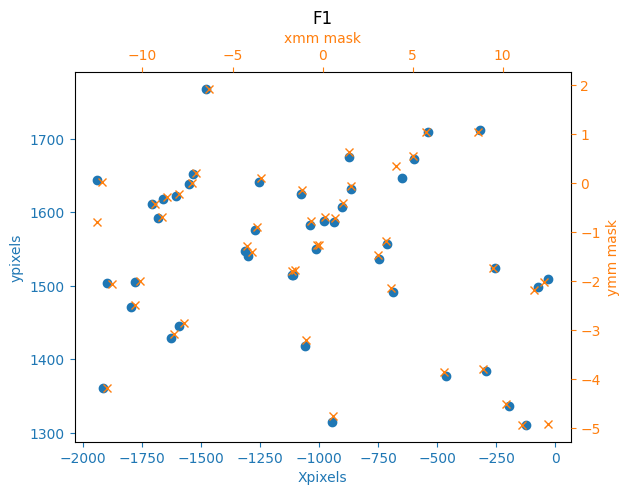

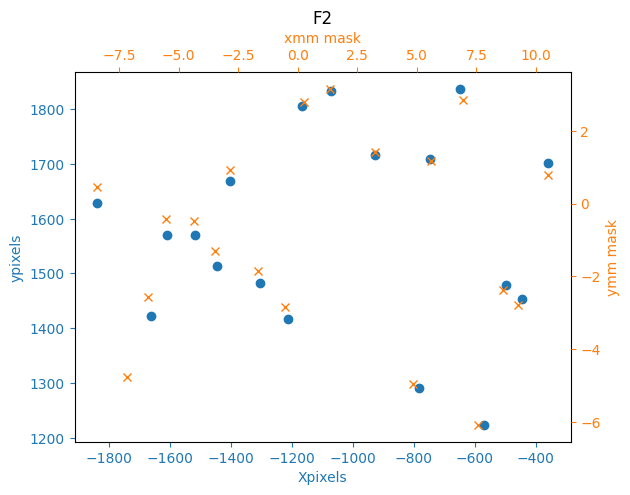

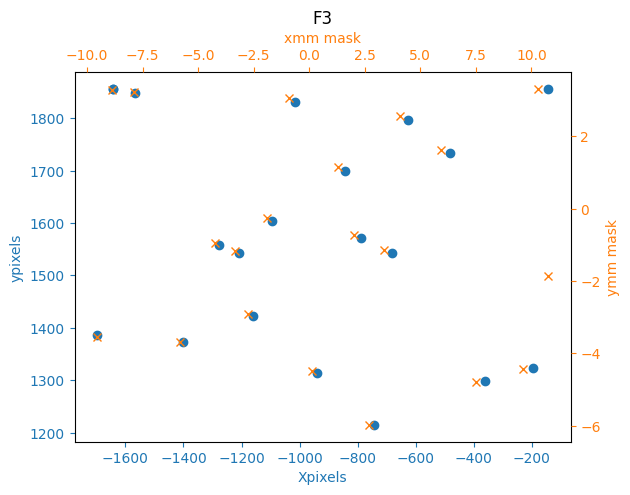

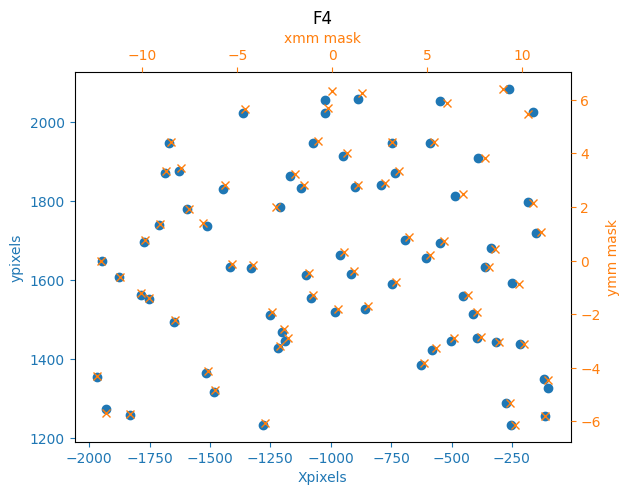

In [4]:
for field,offsety, offsetx,offsetx2 in zip(["F1","F2","F3","F4","QSO","QSObright"],[2,4,3.8,8],[-2000,-8.5,-10,-13],[np.inf,np.inf,np.inf,11.5]):
    cat1 = Table.read("/Users/Vincent/Nextcloud/LAM/FIREBALL/all_diffuse_illumination/2023/18_cold_-120_230819/magnification/%s.csv"%(field))
    cat2 = Table.read("/Users/Vincent/Nextcloud/LAM/FIREBALL/FireBallPipe/Calibration/Targets/2022/targets_%s.csv"%(field))
    # cat2["delta_y_mask"] = cat2["delta_y_mask"].filled(fill_value=0)
    # cat2["delta_x"] = cat2["delta_x"].filled(fill_value=0)
    # table[column_name] = column
    
    # cat2[(cat2["delta_x"]!=0)|(cat2["delta_y_mask"]!=0)]["delta_x","delta_y_mask","Internal-count"]
    import matplotlib.pyplot as plt
    mask1 = (cat1["line"]==206) #& (cat1["X_IMAGE"]>offsetx)
    y1 = cat1[mask1]["X_IMAGE"]
    x1 = -cat1[mask1]["Y_IMAGE"]
    mask=np.ones(len(cat2),dtype=bool) & (cat2["x_mm"]<offsetx2) & (cat2["x_mm"]>offsetx) & (cat2["y_mm"]<offsety)#(cat2["Internal-count"]>=0) #& (cat2["Internal-count"]<14)
    x2 = cat2[mask]["x_mm"] #+1000* cat2["delta_x"]
    y2 = cat2[mask]["y_mm"] #+100000* cat2["delta_y_mask"]
    fig=plt.figure()
    ax=fig.add_subplot(111, label="1")
    ax2=fig.add_subplot(111, label="2", frame_on=False)
    ax.scatter(x1, y1, color="C0",label="pixels")
    ax.set_xlabel("Xpixels", color="C0")
    ax.set_ylabel("ypixels", color="C0")
    ax.tick_params(axis='x', colors="C0")
    ax.tick_params(axis='y', colors="C0")
    ax2.plot(x2, y2,"x", color="C1",label="xmm")
    # for xis,yis,zi in zip(x1,y1,cat1[mask1]["name"]):
    #     print(xis, yis,zi)
    #     ax.text( xis, yis-70,zi, color="C0")
    
    # for xi,yi,ti in zip(x2,y2,cat2[mask]["Internal-count"]):
    #     ax2.text( xi, yi,ti, color="C1")
    ax2.xaxis.tick_top()
    ax2.yaxis.tick_right()
    ax2.set_xlabel('xmm mask', color="C1") 
    ax2.set_ylabel('ymm mask', color="C1")       
    ax2.xaxis.set_label_position('top') 
    ax2.yaxis.set_label_position('right') 
    ax2.tick_params(axis='x', colors="C1")
    ax2.tick_params(axis='y', colors="C1")
    ax2.set_title(field)
    plt.show()
    # sys.exit()


In [ ]:

data = Table.read("/Users/Vincent/Github/FB-dashboard/FlightPrincipalCatalog_v5_tronc.csv")

f = open('/tmp/flight.kml', 'w')

#Writing the kml file.
f.write("<?xml version='1.0' encoding='UTF-8'?>\n")
f.write("<kml xmlns='http://earth.google.com/kml/2.2'>\n")
f.write("<Document>\n")
f.write("<Placemark>\n")
f.write("   <name>flight</name>\n")
f.write("   <LineString>\n")
f.write("       <extrude>1</extrude>\n")
f.write("       <altitudeMode>absolute</altitudeMode>\n")
f.write("       <coordinates>\n")
for i in range(0,len(data['BRD_GPS_126_TM_OPER_ALTITUDE']),1):  #Here I skip some data
    f.write("        "+str(data['BRD_GPS_126_TM_DEBUG_GPSLONGITUDE'][i]) + ","+ str(data['BRD_GPS_126_TM_DEBUG_GPSLATITUDE'][i]) + "," + str(data['BRD_GPS_126_TM_OPER_ALTITUDE'][i]) +"\n")    
f.write("       </coordinates>\n")
f.write("   </LineString>\n")
f.write("</Placemark>\n")
f.write("</Document>")
f.write("</kml>\n")
f.close()
